# Detrás del Marcador: Análisis de Cómo el Factor de Localía y el Ranking FIFA Impactan en las Victorias Futbolísticas

**Tabla de contenidos**<a id='toc0_'></a>    
1. [Introducción](#toc1_)    
2. [Inicialización](#toc2_)    
3. [Preprocesamiento de datos](#toc3_)    
3.1. [Enriquecimiento de los datos](#toc3_1_)    
3.2. [Descripción de los datos](#toc3_2_)    
4. [Análisis exploratorio de datos](#toc4_)    
4.1. [¿Existe tal cosa como la ventaja del equipo local?](#toc4_1_)    
4.2. [¿Qué tan inesperado es que un equipo de bajo ranking gane a un equipo de alto ranking?](#toc4_2_)    
5. [Modelos de predicción: ¿Es posible construir un mejor predictor para ganar un partido que el ranking FIFA?](#toc5_)    
5.1. [Definimos la data para entrenar nuestros modelos](#toc5_1_)    
5.2. [Evaluamos el modelo simple basado en el Ranking FIFA](#toc5_2_)    
5.3. [Definimos el set de entrenamiento y de prueba](#toc5_3_)    
5.4. [Entrenamos y evaluamos nuestro modelo de Regresión Logística Multinomial](#toc5_4_)    
6. [Conclusiones](#toc6_)    
7. [Próximos pasos](#toc7_)    
8. [Apéndices](#toc8_)    
8.1. [Apéndice A: Definiciones](#toc8_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introducción](#toc0_)

En el mundo del fúltbol, cada partido es un enfrentamiento único en el que equipos de distintas procedencias y calibres se desafían en busca de la victoria. Detrás de cada resultado hay una serie de factores que influyen en el desenlace, desde la destreza individual de los jugadores hasta las estrategias de juego adoptadas por los entrenadores. Entre estos factores, dos han capturado la atención de la comunidad futbolística y de los analistas de datos por igual: el factor de jugar como local y el posicionamiento en el ranking FIFA.


El propósito de este proyecto es sumergirse en el análisis de datos para desentrañar la relación entre el desempeño de un equipo en el contexto de su localía y su posición en el ranking FIFA, y cómo estas variables impactan en su probabilidad de victoria. A lo largo de las décadas, se ha especulado ampliamente acerca de si el factor de jugar en casa y la clasificación en el ranking FIFA realmente afectan los resultados de los partidos. Este análisis busca aportar claridad a estas cuestiones, explorando cómo estos factores se entrelazan y contribuyen a las victorias en el deporte más popular del mundo.


Para lograr este objetivo, se examinarán datos detallados de partidos internacionales de fútbol, abarcando un período que va desde 1993 hasta 2022. Estos datos proporcionan una ventana a una amplia variedad de escenarios y situaciones de juego a nivel global, permitiendo un análisis completo y en profundidad. Mediante la aplicación de técnicas estadísticas y herramientas de visualización, se pretende identificar patrones, tendencias y relaciones significativas entre el factor de jugar como local, la posición en el ranking FIFA y el resultado final del partido. Finalmente, se utilizará un modelo de regresión logística para predecir la probabilidad de victoria de un equipo en función de su posición en el ranking FIFA, su condición de local o visitante y otras variables.

## 2. <a id='toc2_'></a>[Inicialización](#toc0_)

In [62]:
# Cargamos todas las librerías
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Mostrar todas las filas y columnas
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

# ocultar warnings
import warnings 
warnings.filterwarnings('ignore')


In [63]:
# Cargamos el archivo de datos en un DataFrame
try:
    data=pd.read_csv('international_matches.csv')
except:
    data=pd.read_csv('hackaton/international_matches.csv')

## 3. <a id='toc3_'></a>[Preprocesamiento de datos](#toc0_)

In [64]:
# Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [65]:
# Muestra aleatoria de 5 filas
data.sample(5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
1413,1996-04-28,Suriname,Guyana,South America,South America,135,156,0,0,2,1,CFU Caribbean Cup qualification,Paramaribo,Suriname,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,1995-03-10,India,Thailand,Asia,Asia,116,92,0,0,0,5,Nehru Cup,Calcutta,India,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4253,2000-02-19,USA,Colombia,North America,South America,22,24,0,0,2,2,Gold Cup,Miami,USA,False,Yes,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5884,2001-09-06,Bahrain,Thailand,Asia,Asia,117,62,0,0,1,1,FIFA World Cup qualification,Riffa,Bahrain,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14828,2012-02-29,IR Iran,Qatar,Asia,Asia,47,96,605,372,2,2,FIFA World Cup qualification,Tehran,IR Iran,False,No,Draw,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observamos un dataset que junta columnas con variables de tipo categórico y numérico. Se pueden realizar algunas transformaciones con el objeto de mejorar la calidad de los datos. Particularmente: 
- Tranformar la columna date a tipo datetime
- Renombrar las columnas traduciendo al español
- Eliminar columnas que no aportan información relevante para el análisis **----podemos hacer esto como idea, confirmar-----**
- Crear nuevas columnas para aportar el análisis

In [66]:
# Transformación a tipo de dato datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [67]:
# Renombre de columnas
data = data.rename(columns={
    'home_team':'equipo_A', 
    'away_team': 'equipo_B',
    'home_team_continent': 'continente_A',
    'away_team_continent': 'continente_B',
    'home_team_fifa_rank': 'fifa_rank_A',
    'away_team_fifa_rank': 'fifa_rank_B',
    'home_team_total_fifa_points': 'fifa_points_A',
    'away_team_total_fifa_points': 'fifa_points_B',
    'home_team_score': 'goles_A',
    'away_team_score': 'goles_B',
    'tournament': 'torneo',
    'city': 'ciudad',
    'country': 'pais',
    'neutral_location': 'locacion_neutral',
    'shoot_out': 'alargue',
    'home_team_result': 'resultado_A',
    'home_team_goalkeeper_score': 'puntuacion_arquero_A',
    'away_team_goalkeeper_score': 'puntuacion_arquero_B',
    'home_team_mean_defense_score': 'puntuacion_defensa_A',
    'home_team_mean_offense_score': 'puntuacion_ofensiva_A',
    'home_team_mean_midfield_score': 'puntuacion_mediocampo_A',
    'away_team_mean_defense_score': 'puntuacion_defensa_B',
    'away_team_mean_offense_score': 'puntuacion_ofensiva_B',
    'away_team_mean_midfield_score': 'puntuacion_mediocampo_B'    
})

In [68]:
# Eliminación de columnas que no aportan información 
# Lista de columnas a eliminar 
columns_to_delete = ['puntuacion_arquero_A', 'puntuacion_arquero_B',
       'puntuacion_defensa_A',
       'puntuacion_ofensiva_A',
       'puntuacion_mediocampo_A',
       'puntuacion_defensa_B',
       'puntuacion_ofensiva_B',
       'puntuacion_mediocampo_B']
# Eliminación de columnas del dataframe
data = data.drop(columns = columns_to_delete)

### 3.1. <a id='toc3_1_'></a>[Enriquecimiento de los datos](#toc0_)

In [69]:
# Se crea una nueva columna que reemplace los valores de la columna resultado_equipo_local por valores numéricos
reemplazos = {'Win': 1, 'Draw': 0, 'Lose': -1}
data['resultado_A_num'] = data['resultado_A'].replace(reemplazos)
data['resultado_A_num'] = data['resultado_A_num'].astype(int)

# Se crea una nueva columna con la diferencia de fifa rank entre el equipo local y el equipo visita
data['diferencia_fifa_rank']=data['fifa_rank_B']-data['fifa_rank_A']

# función para asignar a la diferencia de fifa rank un valor dentro de una escala de multiplos de 50
def rango_diferencia(diferencia):
    if diferencia >=0:
        return math.floor(diferencia / 50) * 50
    else:
        return math.ceil(diferencia / 50) * 50

# Se crea una nueva columna aplicando la función rango_diferencia
data['diferencia_fifa_rank_app'] = (data['fifa_rank_B']-data['fifa_rank_A']).apply(rango_diferencia)

In [70]:
#Agregamos columna con el año para enriquecer los datos
data['año'] = data['date'].dt.year

### 3.2. <a id='toc3_2_'></a>[Descripción de los datos](#toc0_)

Nuestro dataset queda de la siguiente manera:

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      23921 non-null  datetime64[ns]
 1   equipo_A                  23921 non-null  object        
 2   equipo_B                  23921 non-null  object        
 3   continente_A              23921 non-null  object        
 4   continente_B              23921 non-null  object        
 5   fifa_rank_A               23921 non-null  int64         
 6   fifa_rank_B               23921 non-null  int64         
 7   fifa_points_A             23921 non-null  int64         
 8   fifa_points_B             23921 non-null  int64         
 9   goles_A                   23921 non-null  int64         
 10  goles_B                   23921 non-null  int64         
 11  torneo                    23921 non-null  object        
 12  ciudad            

Donde:

- `date`: Corresponde a la fecha del encuentro  
- `equipo_A`: Nombre del equipo A  
- `equipo_B`: Nombre del equipo B  
- `continente_A`: Continente del equipo A  
- `continente_B`: Contienente del equipo B  
- `fifa_rank_A`: Clasificación FIFA del equipo A  
- `fifa_rank_B`: Clasificación FIFA del equipo B  
- `fifa_points_A`: Puntos acumulados del equipo A (sistema de clasificación de la FIFA)  
- `fifa_points_B`: Puntos acumulados del equipo B (sistema de clasificación de la FIFA)  
- `goles_A`: Goles realizados por el equipo A  
- `goles_B`: Goles realizados por el equipo B  
- `torneo`: A que torneo pertenece el encuentro  
- `ciudad`: Ciudad donde se celebra el encuentro  
- `locacion_neutral`: Variable booleana que indica si el encuentro es en el país de uno de los equipos o no  
- `alargue`: Si hubo o no alargue  
- `resultado_A`: Resultado equipo A (Win-Draw-Lose)  
- `resultado_A_num`: Resultado numerico equipo A (1  0 -1)  
- `diferencia_fifa_rank`: Diferencia de rankings (Ranking B-Ranking A)  
- `diferencia_fifa_rank_app`: Diferencia de rankings en grupos de 50  
- `año`: Año del encuentro  

**Nota**: Si el enfretamiento es en el país de uno de los equipos, la variable `locacion_neutral` será False y el equipo A corresponderá al equipo que juega de local

Obtenemos al final un dataset sin valores ausentes y con la información que necesitamos para el análisis.

## 4. <a id='toc4_'></a>[Análisis exploratorio de datos](#toc0_)

In [72]:
# Estadística descriptiva de los datos
descriptive_statistics = data.describe().round(2)
descriptive_statistics

,fifa_rank_A,fifa_rank_B,fifa_points_A,fifa_points_B,goles_A,goles_B,resultado_A_num,diferencia_fifa_rank,diferencia_fifa_rank_app,año
count,23921.00,23921.00,23921.00,23921.00,23921.00,23921.00,23921.00,23921.00,23921.00,23921.00
mean,77.85,80.80,323.40,315.45,1.61,1.07,0.21,2.94,1.57,2008.28
std,52.36,53.23,500.83,490.94,1.63,1.26,0.86,52.98,38.03,8.03
min,1.00,1.00,0.00,0.00,0.00,0.00,-1.00,-210.00,-200.00,1993.00
25%,33.00,36.00,0.00,0.00,0.00,0.00,-1.00,-29.00,0.00,2001.00
50%,71.00,73.00,0.00,0.00,1.00,1.00,0.00,4.00,0.00,2008.00
75%,115.00,119.00,547.00,523.00,2.00,2.00,1.00,35.00,0.00,2015.00
max,211.00,211.00,2164.00,2164.00,31.00,21.00,1.00,209.00,200.00,2022.00


Observamos que: 
- El ranking Fifa lo conforman 211 equipos nacionales. Se conoce por definición que la posición 1 es la mejor y la 211 la peor.
- Los Fifa points son los puntos acumulados que un equipo ha ganado en el sistema de clasificación de la FIFA. La distribución de esta variable está sesgada a la derecha, lo que se deduce por tener una media mayor a la mediana. Esto indica la presencia de valores extremadamente altos en esta columna.
- El promedio de goles de los partidos es de 1.6 para los equipos locales y 1.1 para los equipos visitantes, con una desviación estándar de 1.6 y 1.3 respectivamente y un percentil 75 de 2 goles para ambos casos, lo que indica una variabilidad reducida.
- Curiosamente, se han llegado a anotar hasta 31 goles en un partido.

### 4.1. <a id='toc4_1_'></a>[¿Existe tal cosa como la ventaja del equipo local?](#toc0_)

Hay una creencia de que los equipos cuando juegan de local tienen una ventaja con respecto al equipo de visita. Vamos a indagar en este fenómeno analizando la información que disponemos. Para esto, compararemos el ratio de victorias históricas de los equipos locales (Equipo A) en enfrentamientos jugados en locaciones no neutrales y los compararemos con los enfrentamientos jugados en locaciones neutrales. Para esto, usaremos la columna `locacion_neutral`.

In [73]:
reemplazos = {'Win': 'Gana Equipo A', 'Draw': 'Empate', 'Lose': 'Gana Equipo B'}
data['ganador'] = data['resultado_A'].replace(reemplazos)
ganadas_local = data.pivot_table(index='ganador',columns='locacion_neutral', values='equipo_A',aggfunc='count')
ganadas_local

locacion_neutral,False,True
ganador,,
Empate,4110,1279
Gana Equipo A,9162,2599
Gana Equipo B,4675,2096


In [74]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


fig1 = px.pie(ganadas_local, values=True, names=ganadas_local.index, title='Ubicación neutral: Si')
fig2 = px.pie(ganadas_local, values=False, names=ganadas_local.index, title='Ubicación neutral: No')

fig = go.Figure()

# Agregar las pestañas y gráficos correspondientes

#fig.add_trace(go.Scatter(visible=False))
fig.add_trace(fig1.data[0])
fig.add_trace(fig2.data[0])

# Configurar botones de pestañas
button_layer_1_height = 1.12
fig.update_layout(
    title={'text': '<b>Distribución de resultados según tipo de ubicación</b>', 'x': 0.5, 'xanchor': 'center'},
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            x=0.1,
            y=button_layer_1_height,
            buttons=list([
                dict(label="Ubicación neutral: Si",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Ubicación neutral: Si"}]),
                dict(label="Ubicación neutral: No",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Ubicación neutral: No"}]),
            ]),
            active=1,
        )
    ])

# Mostrar la figura
fig.show()
graph_json = fig.to_json()
#print(graph_json)

Como es de esperar, los equipos al jugar de local históricamente acumulan una mayor cantidad de victorias en relación a los resultados de empate y derrota. Este ratio es mayor que las victorias en partidos de locación neutral. Este resultado sugiere que jugar de local mejora la probabilidad de victoria de un equipo mientras que reduce su probabilidad de empate o derrota.

### 4.2. <a id='toc4_2_'></a>[¿Qué tan inesperado es que un equipo de bajo ranking gane a un equipo de alto ranking?](#toc0_)

A continuacion se intentará cuantificar cuál es la probabilidad de que un equipo de bajo ranking FIFA sea capaz de ganarle a un equipo de alto ranking FIFA. Para esto utilizaremos la columna `diferencia_fifa_rank_app` la cual registra rangos de ventajas (o desventajas) **visto desde la perspectiva del equipo A**.

- Comprobamos en primer lugar cómo se encuentra distribuida la columna de las diferencias del ranking Fifa entre los equipos que se enfrentan en cada partido.

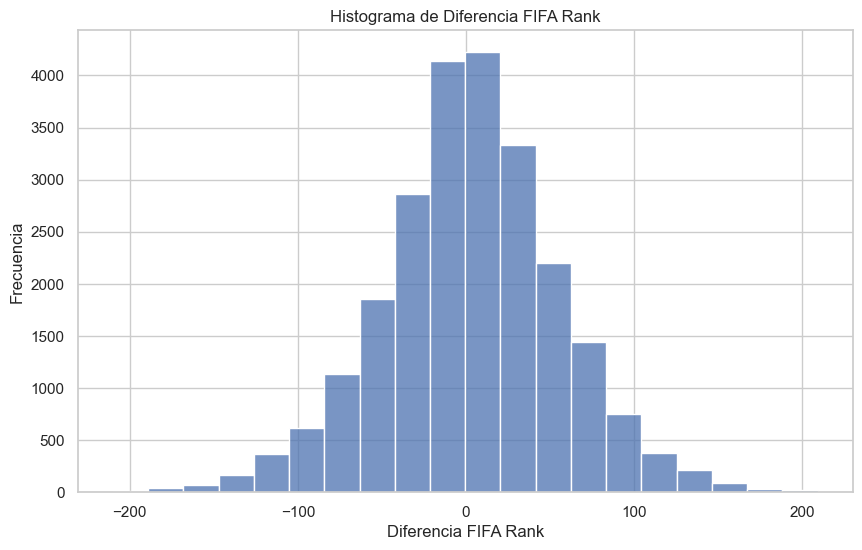

In [75]:
# Graficamos la distribución de la diferencia de ranking FIFA entre los equipos
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear el histograma
sns.histplot(data=data, x='diferencia_fifa_rank', bins=20, kde=False)
plt.title('Histograma de Diferencia FIFA Rank')
plt.xlabel('Diferencia FIFA Rank')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Observamos una distribución que se aproxima a la normal con un centro cercano a cero. Esto nos indica que, por lo general, los equipos enfrentados suelen estar equilibrados (poca diferencia en su posición del ranking) y en pocas ocasiones hay diferencias notables.

In [76]:
# se agrupa la información según su valor asignado en la columna "diferencia_fifa_rank_app" y se contabiliza la cantidad de cada resultado
rangos_data = data.pivot_table(index=['diferencia_fifa_rank_app'], columns='resultado_A', values='equipo_A',aggfunc='count')

rangos_data.reset_index(inplace=True)
rangos_data.columns.name = None
rangos_data=rangos_data.fillna(0)
# Se adicionan columnas con el porcentaje de cada resultado
rangos_data['Draw%']=(rangos_data['Draw']/(rangos_data['Draw']+rangos_data['Lose']+rangos_data['Win']))*100
rangos_data['Lose%']=(rangos_data['Lose']/(rangos_data['Draw']+rangos_data['Lose']+rangos_data['Win']))*100
rangos_data['Win%']=(rangos_data['Win']/(rangos_data['Draw']+rangos_data['Lose']+rangos_data['Win']))*100

En la tabla de a continuación se muestra un resumen con la información histórica de Victorias, Empates y Derrotas **(desde la perspectiva del equipo A)** en función de las diferencias de Ranking.

In [77]:
rangos_data

,diferencia_fifa_rank_app,Draw,Lose,Win,Draw%,Lose%,Win%
0,-200,0.0,7.0,0.0,0.000000,100.000000,0.000000
1,-150,0.0,93.0,2.0,0.000000,97.894737,2.105263
2,-100,103.0,533.0,51.0,14.992722,77.583697,7.423581
3,-50,670.0,1514.0,554.0,24.470416,55.295836,20.233747
4,0,4060.0,4364.0,7781.0,25.053996,26.929960,48.016044
5,50,515.0,244.0,2571.0,15.465465,7.327327,77.207207
6,100,41.0,15.0,683.0,5.548038,2.029770,92.422192
7,150,0.0,1.0,113.0,0.000000,0.877193,99.122807
8,200,0.0,0.0,6.0,0.000000,0.000000,100.000000


In [78]:
#Se modifica la tabla de forma que se obtenga el porcentaje de victorias y empates
# tanto para el equipo local como para el equipo visitante

#Creamos una tabla auxiliar con información de Victorias, Empates, Derrotas desde la perpectiva del equipo A
rangos_data2=rangos_data[['diferencia_fifa_rank_app','Win%','Draw%']]
rangos_data2.columns.name = None
nuevos_nombres = {
    'diferencia_fifa_rank_app': 'Diferencia_FIFA_Rank',
    'Win%': 'Victoria% (equipo local)',
    'Draw%': 'Empates% (equipo local)',
}
rangos_data2 = rangos_data2.rename(columns=nuevos_nombres)
#-----------------------------------------------------

#Creamos una tabla auxiliar con información de Victorias, Empates, Derrotas desde la perpectiva del equipo B
rangos_data3=rangos_data[['diferencia_fifa_rank_app','Lose%','Draw%']]
rangos_data2.columns.name = None

#Invertimos 'diferencia_fifa_rank_app' y reoirdenamos
rangos_data3['diferencia_fifa_rank_app'] = rangos_data3['diferencia_fifa_rank_app'] *-1
rangos_data3 = rangos_data3.sort_values(by='diferencia_fifa_rank_app')

rangos_data3 = rangos_data3.reset_index(drop=True)
nuevos_nombres = {
    'diferencia_fifa_rank_app': 'Diferencia_FIFA_Rank',
    'Lose%': 'Victoria% (equipo visita)',
    'Draw%': 'Empates% (equipo visita)',
}
rangos_data3 = rangos_data3.rename(columns=nuevos_nombres)

#Fusionamos las dos tablas
rangos_data_final = rangos_data2.merge(rangos_data3, on='Diferencia_FIFA_Rank', how='right')

# Se redondean los valores de los porcentajes
#lista_columnas = ['Victoria% (equipo local)','Empates% (equipo local)','Victoria% (equipo visita)','Empates% (equipo visita)']
#rangos_data_final[lista_columnas].round(2)
rangos_data_final

,Diferencia_FIFA_Rank,Victoria% (equipo local),Empates% (equipo local),Victoria% (equipo visita),Empates% (equipo visita)
0,-200,0.000000,0.000000,0.000000,0.000000
1,-150,2.105263,0.000000,0.877193,0.000000
2,-100,7.423581,14.992722,2.029770,5.548038
3,-50,20.233747,24.470416,7.327327,15.465465
4,0,48.016044,25.053996,26.929960,25.053996
5,50,77.207207,15.465465,55.295836,24.470416
6,100,92.422192,5.548038,77.583697,14.992722
7,150,99.122807,0.000000,97.894737,0.000000
8,200,100.000000,0.000000,100.000000,0.000000


In [79]:
# Graficamos las relaciones entre el porcentaje de los resultados de cada equipo y la diferencia de su ranking FIFA

# Crear las líneas y los marcadores con plotly.graph_objs
traces = []

traces.append(go.Scatter(x=rangos_data_final['Diferencia_FIFA_Rank'], y=rangos_data_final['Victoria% (equipo local)'],
                         mode='lines+markers', name='Victorias (equipo local)'))
traces.append(go.Scatter(x=rangos_data_final['Diferencia_FIFA_Rank'], y=rangos_data_final['Empates% (equipo local)'],
                         mode='lines+markers', name='Empates (equipo local)'))
traces.append(go.Scatter(x=rangos_data_final['Diferencia_FIFA_Rank'], y=rangos_data_final['Empates% (equipo visita)'],
                         mode='lines+markers', name='Empates (equipo visita)'))
traces.append(go.Scatter(x=rangos_data_final['Diferencia_FIFA_Rank'], y=rangos_data_final['Victoria% (equipo visita)'],
                         mode='lines+markers', name='Victorias (equipo visita)'))

# Crear una línea vertical
shapes = [dict(type="line", x0=0, x1=0, y0=0, y1=100, line=dict(color="gray", width=2, dash="dash"))]

# Crear el diseño del gráfico
layout = go.Layout(
    title='Relaciones entre Porcentaje de Resultados y Diferencia de Ranking FIFA',
    xaxis=dict(title='<---Desventaja                    Diferencia Ranking                     Ventaja --->'),
    yaxis=dict(title='Porcentaje (%)'),
    legend=dict(font=dict(size=12)),
    shapes=shapes
)

# Crear la figura
fig = go.Figure(data=traces, layout=layout)

# Mostrar el gráfico
fig.show()

Se grafican los datos de forma que si la diferencia es menor a 0, el equipo se encuentra en desventaja por ser de un ranking menor a su adversario, y si la diferencia es mayor a 0, el equipo se encuentra en ventaja por ser de un ranking mayor a su adversario. Al haber obtenido la proporción de victorias y empates de los equipos jugando de local y de visita frente a su total de partidos, se interpretan los resultados en términos de probabilidad.

Por lo tanto, a partir del gráfico se puede observar lo siguiente: 
- Cuando un equipo se encuentra en una desventaja alta (menor a -150) la probabilidad de victoria o empate es muy baja y es casi despreciable el hecho de jugar de local o visitante. 
- Cuando  la desventaja es moderada (entre -100 y -50) la probabilidad de victoria o empate para cualquier equipo es menor al 50%. Sin embargo, es más probable que el equipo local obtenga un empate que un victoria, mientras que lo menos probable es que el equipo visitante obtenga una victoria si está en desventaja.
- Cuando la desventaja es nula (igual a 0) observamos que las probabilidades de empate de ambos equipos o victoria del equipo visitante son similares entre sí pero continúan por debajo del 50%. La probabilidad de victoria del equipo local, en cambio, se acerca al 50%, por lo que la localía mejora la probabilidad de victoria.
- Cuando la ventaja del equipo es moderada (entre 50 y 100) la probabilidad de victoria del equipo local es más alta (entre 70 y 90% aproximadamente) que otro resultado, mientras que la probabilidad de un empate del mismo equipo es la más baja (entre 5 y 20% aproximadamente). 
- Cuando la ventaja del equipo es alta (mayor a 150) la probabilidad de victoria tanto del equipo local como del visitante es muy alta (entre 90 y 100% aproximadamente), mientras que la probabilidad de empate es muy baja (menor al 5% aproximadamente).

En general, se puede decir que la localía otorga una ventaja importante en los partidos, contribuyendo a aumentar las probabilidades de victoria cuando el equipo se encuentra equilibrado o en ventaja frente a su adversario o a aumentar la probabilidad de empate cuando el equipo se encuentra en desventaja frente a su adversario. De manera similar, se puede decir que siempre existirá una mayor probabilidad de victoria de un equipo al jugar de local que al jugar de visitante, independientemente de la ventaja o desventaja que tenga frente a su adversario.

## 5. <a id='toc5_'></a>[Modelos de predicción: ¿Es posible construir un mejor predictor para ganar un partido que el ranking FIFA?](#toc0_)

Basándonos solamente en el ranking FIFA, podemos intentar predecir el resultado de un enfrentamiento comparando la diferencia de rankings, en donde:

- Si el ranking del equipo A es mayor que el equipo B, entonces predecimos que ganará el equipo A
- Si el ranking del equipo B es mayor que el equipo A, entonces predecimos que ganará el equipo B

Claramente, este criterio es muy simple y deja de lado muchas variables importantes, como por ejemplo, si el equipo juega de local o no, dónde y cuándo se juega, qué tipo de torneo es, los fifa points, etc.  

Es por esto que intentaremos crear un modelo de predicción que sea considere todas estas variables y evaluaremos su desempeño comparándolo con el criterio descrito anteriormente.

### 5.1. <a id='toc5_1_'></a>[Definimos la data para entrenar nuestros modelos](#toc0_)

In [80]:
data_prediccion=data[['equipo_A',
                      'equipo_B',
                      'continente_A',
                      'continente_B',
                      'fifa_rank_A',
                      'fifa_rank_B',
                      'fifa_points_A',
                      'fifa_points_B',
                      'torneo',
                      'ciudad',
                      'pais',
                      'locacion_neutral','año','resultado_A_num']]

#reemplazos = {'Win': 1, 'Draw': 0, 'Lose': -1}
#data_prediccion['resultado_equipo_A'] = data2['resultado_A'].replace(reemplazos)
#data_prediccion['resultado_equipo_A'] = data2['resultado_A']
data_prediccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   equipo_A          23921 non-null  object
 1   equipo_B          23921 non-null  object
 2   continente_A      23921 non-null  object
 3   continente_B      23921 non-null  object
 4   fifa_rank_A       23921 non-null  int64 
 5   fifa_rank_B       23921 non-null  int64 
 6   fifa_points_A     23921 non-null  int64 
 7   fifa_points_B     23921 non-null  int64 
 8   torneo            23921 non-null  object
 9   ciudad            23921 non-null  object
 10  pais              23921 non-null  object
 11  locacion_neutral  23921 non-null  bool  
 12  año               23921 non-null  int64 
 13  resultado_A_num   23921 non-null  int32 
dtypes: bool(1), int32(1), int64(5), object(7)
memory usage: 2.3+ MB


Ahora que tenemos nuestras variables de interés, es momento de definir las variables característica y la variable objetivo. En este caso, nuestra *variable objetivo* (a predecir) será `resultado_A_num` la cual:  
- Asigna 1 si gana el equipo A (pierde equipo B)
- Asigna 0 si empata el equipo A (ambos empatan)
- Asigna -1 si pierde el equipo A (gana equipo B) 

El resto de variables serán las *variables característica*. Dado que la variable objetivo puede asumir 3 valores diferentes, nuestro modelo de predicción será un **modelo de clasificación**.

### 5.2. <a id='toc5_2_'></a>[Evaluamos el modelo simple basado en el Ranking FIFA](#toc0_)

A continuación construiremos un modelo simple que considere los criterios definidos arriba y evaluaremos su desempeño.

In [81]:
#Creamos modelo que predice que gana A si su ranking es mayor y viceversa
def prediccion_basica(row):
    if row['fifa_rank_A']>row['fifa_rank_B']:
        return 1
    elif row['fifa_rank_B']>row['fifa_rank_A']:
        return -1
    else:
        return 0 

#Probamos el desempeño    
prediction_basic = data_prediccion.apply(prediccion_basica, axis=1).values
#print(classification_report(target_valid,prediction_basic))
prediction_basic = pd.Series(prediction_basic,name='prediccion_simple')

In [82]:
# Generamos los resultados y obtenenmos una muestra
resultados= pd.concat([data_prediccion['resultado_A_num'],prediction_basic], axis=1)
def comparar_prediccion(row):
    if row['resultado_A_num']==row['prediccion_simple']:
        return "Acertó"    
    else:
        return "Falló" 

resultados['resultado'] = resultados.apply(comparar_prediccion, axis=1).values
resultados.sample(10)

,resultado_A_num,prediccion_simple,resultado
23537,1,-1,Falló
11477,-1,1,Falló
14130,1,-1,Falló
17903,-1,-1,Acertó
9000,-1,1,Falló
9002,-1,1,Falló
7931,0,-1,Falló
1567,-1,1,Falló
17638,0,1,Falló
4764,0,1,Falló


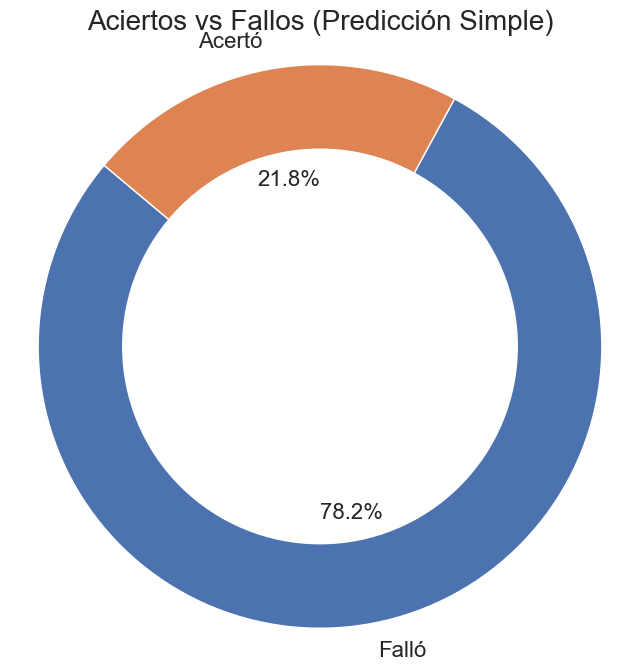

In [83]:
# Generamos una gráfica de pastel para ver los aciertos y fallos de la predicción simple
value_counts=resultados['resultado'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts,labels=value_counts.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 16})
plt.axis('equal')  # Esto asegura que el gráfico sea circular
plt.title('Aciertos vs Fallos (Predicción Simple)', fontsize=20)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.show()

### 5.3. <a id='toc5_3_'></a>[Definimos el set de entrenamiento y de prueba](#toc0_)

Para entrenar nuestro modelo, separaremos los 23921 datos en dos. Un dataset con el 80% de los datos, el cual utilizaremos ara enseñarle a nuestro modelo a predecir (entrenamiento), mientras que el 20% restante será utilizado para testear el desempeño de nuestro modelo. Se hace esta manera para asegurarnos que nuestro modelo este analizando información que nunca antes ha visto. Finalmente, para evaluar el desempeño de nuestro modelo, compararemos las predicciones del modelo con los resultados reales y contabilizaremos el porcentaje de aciertos.

In [84]:
#Aplicamos la codificacion One-shoo para un mejor manejo de los datos
data_ohe=pd.get_dummies(data_prediccion, drop_first=True)

In [85]:
#Apartamos un 20% de los datos para la prueba de desempeño
train, test = train_test_split(data_ohe, test_size=0.2)
train = train.dropna()

#Objetivo y caracteristicas (entrenamiento)
features_train=train.drop('resultado_A_num', axis=1)
target_train=train['resultado_A_num']

#Objetivo y caracteristicas (validación)
features_valid=test.drop('resultado_A_num', axis=1)
target_valid=test['resultado_A_num']

### 5.4. <a id='toc5_4_'></a>[Entrenamos y evaluamos nuestro modelo de Regresión Logística Multinomial](#toc0_)

In [86]:
#Escalamos las caracteristicas de entrenamiento y prueba
scaler = StandardScaler()
features_scaled_train = scaler.fit_transform(features_train)
features_scaled_valid = scaler.transform(features_valid)

In [87]:
#Definimos nuestro modelo (Regresion Logistica)
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#Entrenamos
model_lr.fit(features_scaled_train,target_train)

LogisticRegression(multi_class='multinomial')

In [88]:
#Predecimos con la data de prueba
prediction_lr=model_lr.predict(features_scaled_valid)
prediction_lr = pd.Series(prediction_lr, index=features_valid.index,name='prediccion_lr')

# Generamos los resultados y obtenenmos una muestra
resultados= pd.concat([target_valid,prediction_lr], axis=1)

def comparar_prediccion(row):
    if row['resultado_A_num']==row['prediccion_lr']:
        return "Acertó"    
    else:
        return "Falló" 

resultados['resultado'] = resultados.apply(comparar_prediccion, axis=1).values
resultados.sample(10)

,resultado_A_num,prediccion_lr,resultado
13040,-1,-1,Acertó
10366,-1,-1,Acertó
5178,-1,0,Falló
20401,1,1,Acertó
10217,-1,-1,Acertó
20084,0,0,Acertó
11507,-1,-1,Acertó
22365,-1,-1,Acertó
17968,-1,-1,Acertó
17235,-1,1,Falló


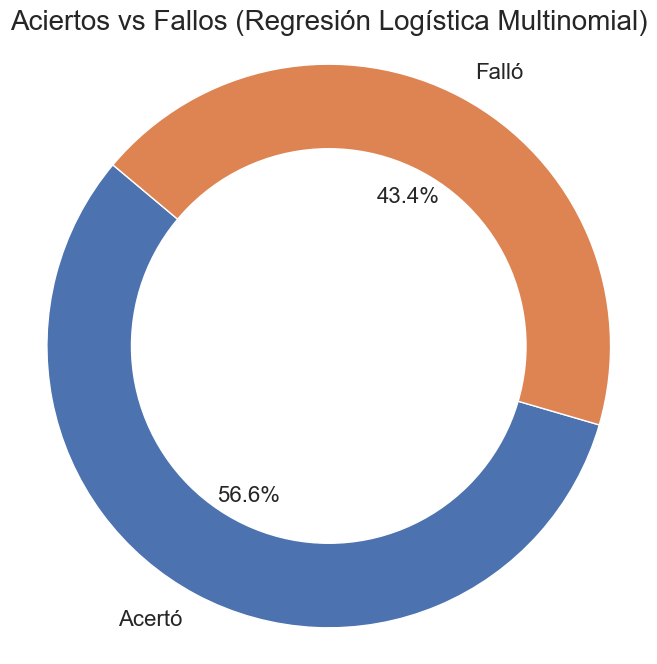

In [89]:
# Generamos una gráfica de pastel para ver los aciertos y fallos de la predicción simple
value_counts=resultados['resultado'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts,labels=value_counts.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 16})
plt.axis('equal')  # Esto asegura que el gráfico sea circular
plt.title('Aciertos vs Fallos (Regresión Logística Multinomial)', fontsize=20)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.show()

Si bien, un 55.3% de aciertos no puede parecer mucho, recordemos que las variables a predecir son 3 (Gana, Pierde, Empata) y que la probabilidades de acertar al azar son de un 33%. Además, el desempeño de nuestro modelo está muy por sobre el modelo simple basado en el ranking FIFA (21.8% de aciertos).

In [90]:
# Despliegue de métricas principales
print(classification_report(target_valid,prediction_lr))

              precision    recall  f1-score   support

          -1       0.54      0.53      0.54      1393
           0       0.30      0.15      0.20      1084
           1       0.63      0.78      0.70      2308

    accuracy                           0.57      4785
   macro avg       0.49      0.49      0.48      4785
weighted avg       0.53      0.57      0.54      4785



Finalmente, analizando el desempeño de nuestro modelo en detalle, obtenemos los siguiente resultados:

- El modelo predice con un 63% de precisión las victorias del equipo A
- El modelo predice con un 25% de precisión los empates
- El modelo predice con un 57% (100-63%) de precisión clas victorias del equipo B

Previamente habíamos encontrado que, basándonos en la información histórica, los equipos cuando juegan de local tienen una mayor probabilidad de victoria que al jugar de visitante. Por lo tanto, cabe destacar que este resultado es consistente con el desempeño de nuestro modelo, el cual asigna una mayor probabilidad de victoria al equipo A (local) que al equipo B (visitante). Nuevamente, el factor de localía parece tener un peso importante en el resultado de los partidos.

## 6. <a id='toc6_'></a>[Conclusiones](#toc0_)

- Se llevó a cabo un preprocesamiento de los datos, en el se transformaron tipos de datos y se renombraron columnas para facilitar el análisis de los datos. También se eliminaron las columnas que no eran relevantes para el análisis y se agregaron nuevas que se consideraron vitales para el análisis.
- En un análisis preliminar, se encontró que los puntos FIFA exhiben una distribución sesgada a la derecha, sugiriendo equipos con puntuaciones excepcionalmente altas, y que los promedios de goles muestran equilibrio competitivo, con la mayoría de los partidos teniendo pocos goles. Estos insights brindan una visión integral del panorama competitivo de los equipos nacionales.
-  Los equipos que juegan en casa han registrado históricamente más victorias en comparación con empates y derrotas. En cuanto a su ranking Fifa, es más frecuente que se enfrenten equipos de ranking similar, por lo que los partidos generalmente están equilibrados.
- Se encontró que  la localía conlleva una ventaja significativa en los partidos, aumentando las chances de victoria cuando el equipo está equilibrado o adelante, o incrementando la probabilidad de empate cuando está en desventaja. Asimismo, se observa que en general, jugar en casa aumenta las posibilidades de ganar en comparación con jugar como visitante, sin importar su diferencia en el ranking Fifa. 
- Finalmente, se desarrollo un modelo de regresión logística multinomial para predecir el resultado de un partido. El modelo logró una precisión superior al 50% en la predicción de resultados, superando al modelo de predicción simple basado únicamente en el ranking FIFA y superando la precisión cercana al 33% que se obtendría al predecir el resultado de un partido al azar. Adicionalmente, el modelo también asigna una mayor probabilidad de victoria al equipo que juega de local, lo que confirma la ventaja de jugar en casa.


## 7. <a id='toc7_'></a>[Próximos pasos](#toc0_)

Con el objetivo de mejorar o complementar los resultados obtenidos, se sugieren a continuación una serie de pasos a seguir: 
- Considerar en el análisis el tipo de torneo al que pertenece cada partido.
- Investigar si hay factores externos que puedan influir en los resultados como la ubicación geográfica.
- Considera la construcción de modelos predictivos alternativos que puedan mejorar el procentaje de aciertos.

## 8. <a id='toc8_'></a>[Apéndices](#toc0_)

### 8.1. <a id='toc8_1_'></a>[Apéndice A: Definiciones](#toc0_)

**FIFA Rank (Ranking FIFA):**
El "FIFA rank" o ranking FIFA es una clasificación numérica de los equipos nacionales de fútbol de todo el mundo. Se basa en los puntos acumulados por los equipos en el sistema de clasificación de la FIFA. Los equipos se ordenan en función de la cantidad de puntos que tienen, de mayor a menor. El equipo con más puntos tiene el rango más alto. El ranking FIFA se actualiza mensualmente y se utiliza para determinar las cabezas de serie en los sorteos de torneos internacionales y para evaluar la posición relativa de los equipos en el escenario mundial.

**FIFA Points (Puntos FIFA):**
Los "FIFA points" se refieren a la cantidad acumulada de puntos que un equipo ha ganado en el sistema de clasificación de la FIFA. Estos puntos se otorgan en función del rendimiento del equipo en partidos internacionales. Los factores que influyen en la cantidad de puntos que un equipo gana incluyen el resultado del partido, la importancia del partido, el nivel del equipo contrario y el tipo de competición. Estos puntos se suman a lo largo del tiempo a medida que el equipo juega más partidos y se utilizan para determinar su posición en el ranking de la FIFA.